The  main.ipynb notebook summarizes and discusses the results of the comparison between karamoram_analysis.ipnyb and the non-karakoram_analysis.ipnyb.

# Introduction 

Glaciers have become an icon of anthropogenic warming and climate change. It is well known throughout the world that most glaciers are in steep decline. However, there is one small region in Pakistan, the Karakoram, which has emerged as the largest of the very few examples of glaciers continuing to grow today (Hewitt, 2005, p. 339). Glaciers  in this region have exhibited mass stability or even expansion, contrasting the mass loss seen in the  nearby Himalayas and Tibetan Plateau as well as  other mid-latitude glaciers globally (Kapnick et al., 2014, p. 834). The Karakoram has become well known for being an anomaly. Glaciologists have hypothesized factors such as great elevations, relief, and distinctive climatic regimes as responsible for what has become known as the "Karakoram Anomaly" (Hewitt, 2005, p. 339). From 2000-2020, “the region has shown balanced to slightly positive glacier budgets, an increase in glacier ice flow speeds, stable to partially advancing glacier termini and widespread glacier surge activity” (Farinotti et al., 2020, p. 8).  Surge-type glaciers, like the Karakoram Anamoly, go through a quiescent phase, where flow is normal and slow, as well as an active phase where they surge to a higher flow velocity, often factored 10-100 times the normal flow (Davies, 2020, p. 2202).

This analysis compares the South Rimo Glacier in the Karakoram with two other “Surge Type” glaciers: the Medvezhiy Glacier in the Pamir mountains of nearby Tajikistan and the Sít’ Kusá Glacier in Alaska. The project seeks to answer whether there is evidence of the Karakoram Anomaly within this comparison, using statistical analysis of glacial velocity. Increased velocity is associated with decreased glacial mass, as a glacier can slide across a bed rock surface faster if there is less mass (due to a decrease in friction) keeping it in place. We do this by creating preprocessing visualizations, analyzing mean velocities over time as well as within seasonality, and visualizing cumulative mean velocity and acceleration trends, combined with overall evaluation and comparison. 

# Goal of Analysis

This analysis compares the South Rimo Glacier in the Karakoram with two other “Surge Type” glaciers: the Medvezhiy Glacier in the Pamir mountains of nearby Tajikistan and the Sít’ Kusá Glacier in Alaska. The project seeks to answer two main questions: Is there evidence of the Karakoram Anomaly within this comparison, as we would expect given prior research on the region; and how does the effect compare to the other two surge-type glaciers we examine, one of which is located geographically close to the Karakoram mountain range, the Medvezhiy Glacier in Tajikistan, and the other, the Sít’ Kusá Glacier in Alaska, which has very different climate and located in a completely different region than the other two. 

We answer these questions using statistical analysis of glacial velocity. Increased velocity is associated with decreased glacial mass, as a glacier can slide across a bed rock surface faster if there is less mass (due to a decrease in friction) keeping it in place. By creating preprocessing visualizations, analyzing mean velocities over time as well as within seasonality, and visualizing cumulative mean velocity and acceleration trends, we evaluate the velocity trends exhibited and compare.

# About the Data


For this project we utilized the NASA earthaccess python library to get velocity maps for the South Rimo Glacier in the Karakoram mountain range in Pakistan, the Sít’ Kusá Glacier in Alaska, and the Medvezhiy Glacier in Tajikistan. For reproducability, the raw data is included in the repository – data for each glacier is available within the `data/Karakoram` and `data/Other_Glaciers` directories, with no download required for user. If you are interested in downloading the data for further exploration, the eda notebook has lines of code commented out that would enable you to download the dataset we used, as well as the data for other glaciers. 

The dataset was cleaned and pre-processed, making it suitable for anlaysis and modeling tasks. 

We chose to trim each dataset to match the time interval of the smallest data set, the Alaskan glacier, in order for more accurate comparison and user readability. Additionally, our datasets are not all of the same density: though we trimmed them all to have the same start and end date, the dataset for the Karakoram glacier is far more robust than the dataset for the Alaskan glacier, which may skew some results. 

One assumption we made about the dataset, which are all GeoTIFF format, is that they are all georeferenced correctly and in the same way (i.e. using the same projection), so that each point is mapping to the correct location. It would be unlikely for a dataset like this to be georeferenced differently across a single glacier, and differences in projections across the different glaciers would not be problematic for comparision, so this felt like a safe and necessary assumption to make. Another assumption we made about the dataset is that keeping N/A or missing variables was worth doing, despite it leaving some white spaces on our maps. 

Important points: 
The South Rimo Glacier:
    Has an average elevation of approximately 5,588 m above sea level. (https://en-gb.topographic-map.com/map-dvpckl/South-Rimo-Glacier/). 
    Approximately -19 degrees F colder than Tajikistan on average across all seasons. 
    Both this and Tajikistan are very similar latitudes and longitudes. Alaska almost completely opposite. 
    Sees the least precipiation across all 3 glaciers. 
The Sít’ Kusá Glacier in Alaska:
    Starts at approximately 3,353 m above sea level. (https://coastview.org/2024/05/02/turner-glacier-disenchantment-bay/) 
    Apprix 10-20 degrees F warmer than Medvezhiy glacier across all seasons. 
    This glacier sees the most precipitation across all 3 glaciers. 
The Medvezhiy Glacier in Tajikistan elevation is approximately (3,000-5,500), 4,500 m above sea level. (https://www.earthobservatory.nasa.gov/images/51498/medvezhiy-glacier-advances) 

All see highest temps in July/August and lowest in October-Feb.

Climatic data found using this tool: https://www.meteoblue.com/en/weather/historyclimate/climatemodelled/rimo-glacier_pakistan_1166893 

# Data Exploration

### Import the necessary packages:

In [ ]:
from IPython.display import Image

## Important Notes: 
As we begin our exploration of the data, there are a few important aspects of each glacier that are worth noting. All climatic data was retrieved through this incredibly useful tool, in which we input each glacier name and got a wealth of information: https://www.meteoblue.com/en/weather/historyclimate/climatemodelled/rimo-glacier_pakistan_1166893 

The Karakoram South Rimo Glacier has an average elevation of approximately 5,588m above sea level, approximately 1,000m higher than the The Medvezhiy Glacier in Tajikistan (avg 4,500m above sea level), and approximately 2,000m higher than The Sít’ Kusá Glacier in Alaska (which starts at approximately 3,353m above sea level). 
The Karakoram South Rimo Glacier is approximately 19 degrees F colder than The Medvezhiy Glacier in Tajikistan on average across all seasons, and approximately 30 degrees F colder than The Sít’ Kusá Glacier in Alaska on average across all seasons. 
Interestingly, The Karakoram South Rimo Glacier recieves the least precipation (on average) of all three glaciers, and the Alaskan glacier recieves the most. 

This places the Karakoram at the highest elevation, with the coldest temperatures, and the least rainfall. 

All three glaciers experience similar seasons, with their highest temperatures occurring in July/August and lowest temperatures occurring between October-February. 

## Mean Velocities Over Time
We begin by analyzing the mean velocities over time of our three glaciers, starting with the Karakoram glacier. 
Through this analysis we strip away the location-data to look at the average velocities in a much more simple manner. This gives us an initial understanding the magnitude size (noting that the scales are different between the two images).

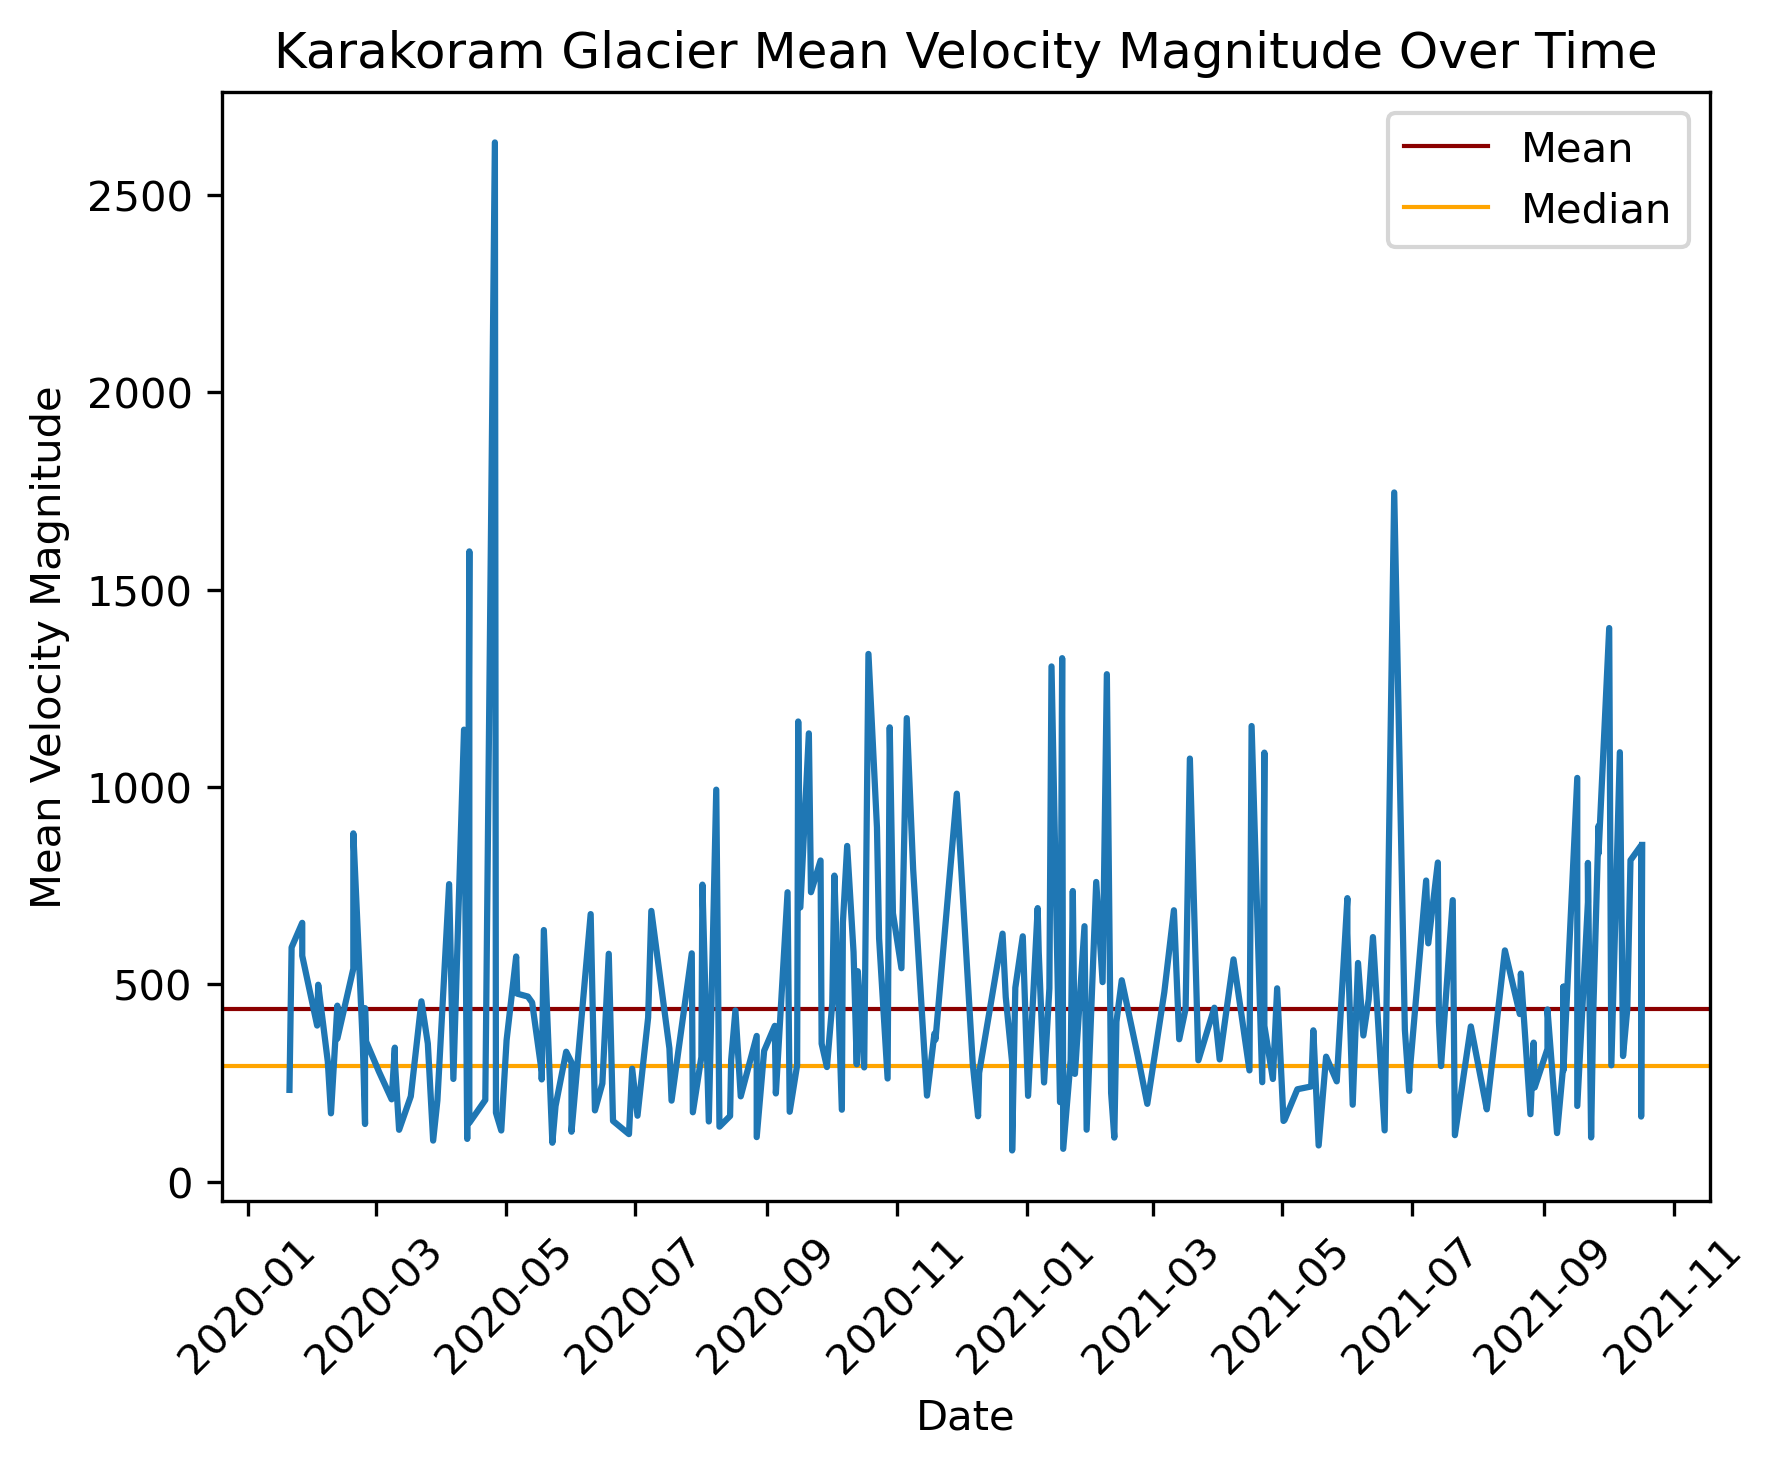

In [7]:
Image(filename = 'figures/K_meanmag_chart.png', width=800, height=800)

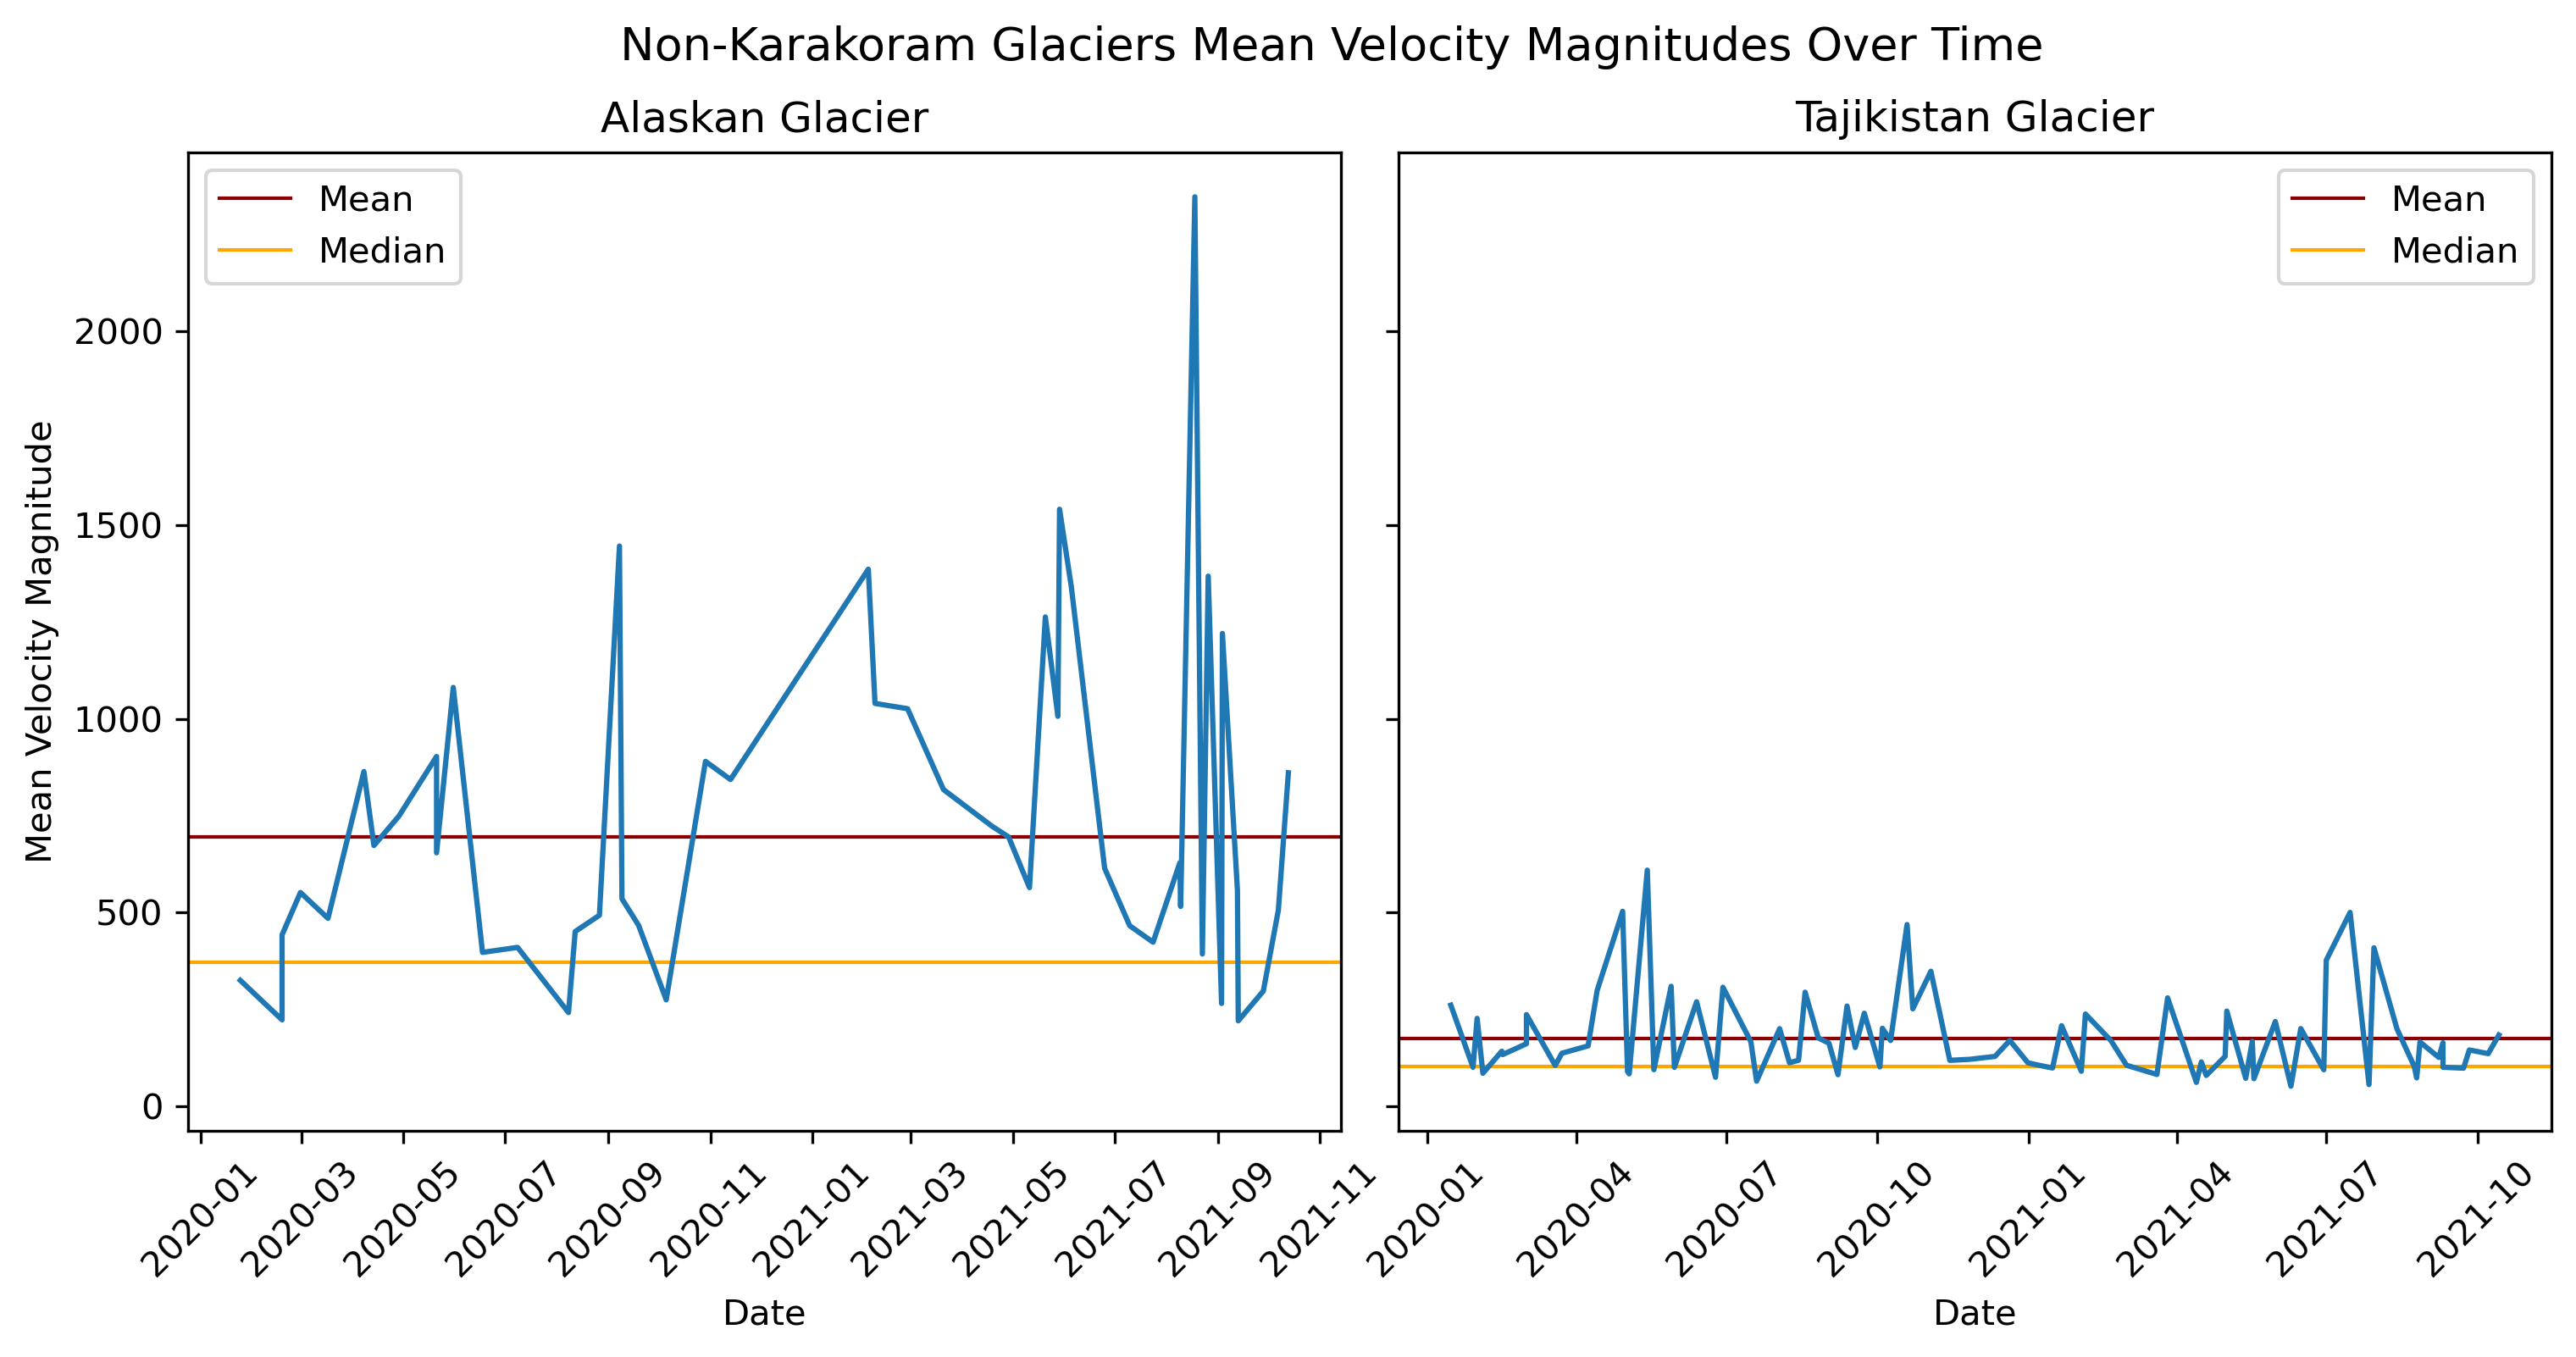

In [8]:
Image(filename = 'figures/NK_meanmag_chart.png', width=800, height=800)